## Regresión Lasso

La regresión __Lasso__ (__Least Absolute Shrinksge and Selection Operator__), es similar a la regresión __Ridge__, simplemente cambia el término de regularización. En vez de utilizar __L2__, se utiliza la regularización __L1__.

Función de coste de __Lasso__

$$
J\left ( \theta \right )= \frac{1}{n}\sum_{i=1}^{n}\left ( y^{i}-\theta ^{T}x^{i} \right )^{2}+\alpha \sum_{i=1}^{n}|\theta_{i}|
$$

La regresión __Lasso__ tiende a eliminar las caracteristicas menos importantes, asignándoles valores cercanos a cero. A diferencia de la norma __L2__, la regularización __L1__ usada por __Lasso__ no es derivable, pero el método del gradiente descendiente funciona correctamente en ella.


En el siguiente codigo se utilizad el __df__ Boston e importamos __linear_model__ de __Lasso__.


Slope: [-0.41112746], intercept: 24.018425082751754
Slope: [0.14158737], intercept: 20.923858967771817
Slope: [8.49321328], intercept: -30.84393390292735
Slope: [-0.94415475], intercept: 34.47925604595717


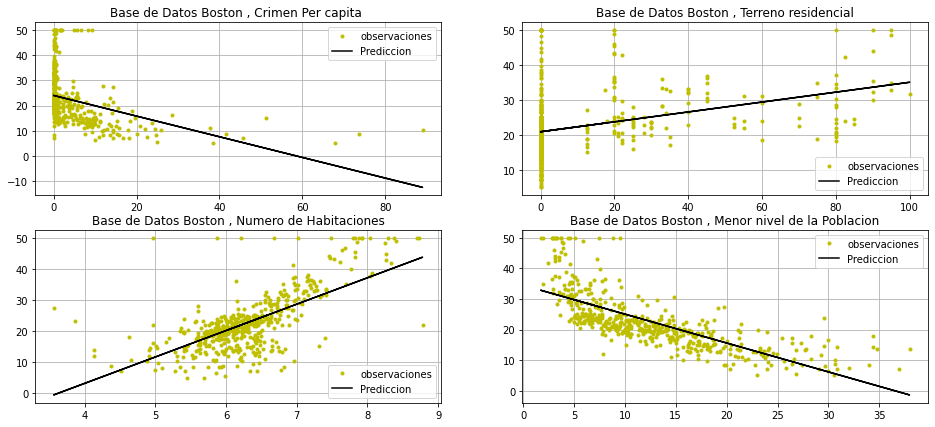

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
import numpy as np

fig, axs = plt.subplots(2,2, figsize=(16,7))

def plot(data2D, target1D, predict1D, i, labels):
    axs[int(i/2),i%2].plot(data2D, target1D, 'y.', markersize=6,
                           label='observaciones')
    axs[int(i/2),i%2].plot(data2D, predict1D, 'k-', label='Prediccion')

    axs[int(i/2),i%2].legend()
    axs[int(i/2),i%2].set_title('Base de Datos Boston , '+ labels[i])
    axs[int(i/2),i%2].grid()
    return

boston = load_boston()
y = boston.target      # Vector objetivo
CRIM = 0; ZN = 1; ROOMS = 5; LSTAT = 12
labels = ('Crimen Per capita ','Terreno residencial','Numero de Habitaciones','Menor nivel de la Poblacion')

for i, attribute in zip(range(4),[CRIM, ZN, ROOMS, LSTAT]):
    X = boston.data[:,attribute]   # Caracteristicas
    # Los metodos de ajuste de regresion necesitan una matriz de datos como argumento
    X = X[:, np.newaxis]           
    lasso = Lasso(alpha=0.3)
    lasso.fit(X, y)
    print("Slope: "+str(lasso.coef_)+", intercept: "+str(lasso.intercept_))
    y_pred = lasso.predict(X)
    plot(X, y, y_pred, i, labels)
